<a href="https://colab.research.google.com/github/EvelynH2/proyecto_integrado_2/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# prompt:  armae un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases

import pandas as pd
import numpy as np
import random

# Define possible values for columns
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Lopez', 'Martinez', 'Garcia', 'Sanchez', 'Romero', 'Torres']
nombres = ['Juan', 'Maria', 'Jose', 'Ana', 'Carlos', 'Laura', 'Pedro', 'Sofia', 'Miguel', 'Isabel']
materias = ['Matemáticas', 'Lengua y Literatura', 'Ciencias Naturales', 'Historia', 'Geografía', 'Educación Física', 'Inglés', 'Artes']

# Generate DataFrame
df = pd.DataFrame({
    'Apellido': [random.choice(apellidos) for _ in range(100)],
    'Nombre': [random.choice(nombres) for _ in range(100)],
    'Nro_DNI': np.random.randint(10000000, 99999999, size=100),
    'Materia escolar': [random.choice(materias) for _ in range(100)],
    'nota 1er Trimestre': np.random.randint(1, 11, size=100),  # Notas del 1 al 10
    'nota 2do Trimestre': np.random.randint(1, 11, size=100),
    'nota 3er Trimestre': np.random.randint(1, 11, size=100),
    'Faltas a clases': np.random.randint(0, 20, size=100)  # Faltas hasta 20
})

# Print the DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia escolar,nota 1er Trimestre,nota 2do Trimestre,nota 3er Trimestre,Faltas a clases
0,Torres,Ana,87850167,Geografía,10,2,6,13
1,Garcia,Carlos,54780716,Matemáticas,4,2,5,16
2,Rodriguez,Carlos,12260973,Historia,4,3,10,3
3,Rodriguez,Miguel,22408442,Educación Física,6,2,3,2
4,Torres,Sofia,71443313,Lengua y Literatura,1,5,1,0
...,...,...,...,...,...,...,...,...
95,Sanchez,Laura,28140579,Ciencias Naturales,6,8,9,4
96,Sanchez,Jose,70716036,Historia,1,8,4,11
97,Sanchez,Pedro,62405407,Historia,10,2,3,5
98,Romero,Maria,38573096,Lengua y Literatura,9,7,8,19


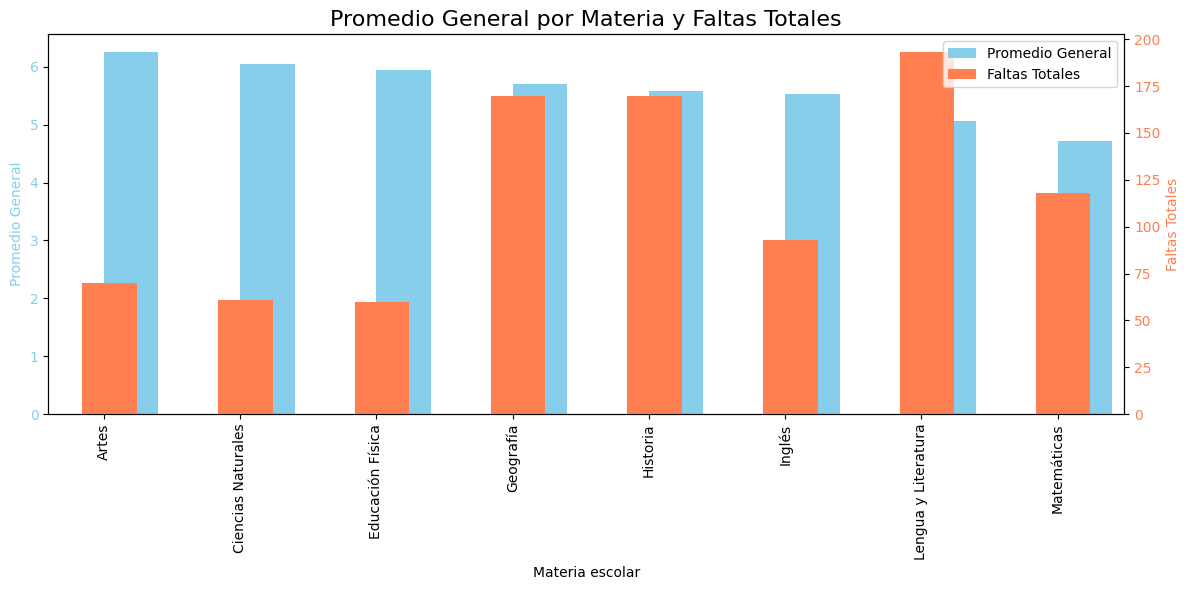

In [9]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average grade for each subject
average_grades = df.groupby('Materia escolar')[['nota 1er Trimestre', 'nota 2do Trimestre', 'nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia escolar')['Faltas a clases'].sum()

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind='bar', color='skyblue', ax=ax1, position=0, width=0.4, label='Promedio General')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for absences
ax2 = ax1.twinx()
total_absences.plot(kind='bar', color='coral', ax=ax2, position=0.4, width=0.4, label='Faltas Totales')
ax2.set_ylabel('Faltas Totales', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')

# Customize the plot
plt.title('Promedio General por Materia y Faltas Totales', fontsize=16)
plt.xlabel('Materia Escolar', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()

In [10]:
df.to_csv("datos_alumnos.csv", index=False)
